# 1) Kütüphane İmport

In [657]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [658]:
#C   Other Features
#p | x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
#e | x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g

# Ham  Dataset in  formatı yukardaki gibi 
# Class değeri ilk sütün, (p ve e değerlerini içeriyor) (edible=e, poisonous=p)

# 2) Veriyi İçe Aktarma

In [659]:
# Sütun isimlerini tanımla
columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor',
           'gill-attachment','gill-spacing','gill-size','gill-color',
           'stalk-shape','stalk-root','stalk-surface-above-ring',
           'stalk-surface-below-ring','stalk-color-above-ring',
           'stalk-color-below-ring','veil-type','veil-color',
           'ring-number','ring-type','spore-print-color',
           'population','habitat']

# Veriyi oku
df = pd.read_csv('agaricus-lepiota.data', names=columns)

# 3) Dataset Kontrolleri

In [660]:
# Düzenlenmiş veri setinin ilk 5 satırını göster
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [661]:
# Düzenlenmiş veri setinin son 5 satırını göster
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8113,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8114,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8115,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8116,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8117,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [662]:
# Datasetin içindeki '?' değerlerini kontrol et
df.isin(['?']).sum()

#Çıktı:
# Sadece '?' değerleri 'stalk-root' sütununda var 2480 adet

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [663]:
# Datasetin içinde boş değerleri kontrol et
df.isnull().sum()

#Çıktı:
# Sadece 'stalk-root' sütununda boş değerler var 2480 adet (? olarak gözüküyor)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [664]:
# Class değerlerinin dağılımını kontrol et
df['class'].value_counts()

#Çıktı: (Dengeli)
# e    4208
# p    3916

class
e    4205
p    3913
Name: count, dtype: int64

In [665]:

df.info()
#Dataset genel bilgileri
#Çıktı:
# RangeIndex: 8124 entries, 0 to 8123
# Data columns (total 23 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8118 non-null   object
 1   cap-shape                 8118 non-null   object
 2   cap-surface               8118 non-null   object
 3   cap-color                 8118 non-null   object
 4   bruises                   8118 non-null   object
 5   odor                      8118 non-null   object
 6   gill-attachment           8118 non-null   object
 7   gill-spacing              8118 non-null   object
 8   gill-size                 8118 non-null   object
 9   gill-color                8118 non-null   object
 10  stalk-shape               8118 non-null   object
 11  stalk-root                8118 non-null   object
 12  stalk-surface-above-ring  8118 non-null   object
 13  stalk-surface-below-ring  8118 non-null   object
 14  stalk-color-above-ring  

In [666]:
#Tekrar eden değerleri kontrol et
df.duplicated().sum()
#Çıktı:
# 0


np.int64(0)

# 4) Data Analaizi ve Keşfi

In [667]:
# Datasetin ayrıntılı bilgilerini kontrol et
df.describe().T

,count,unique,top,freq
class,8118,2,e,4205
cap-shape,8118,6,x,3653
cap-surface,8118,4,y,3244
cap-color,8118,10,n,2284
bruises,8118,2,f,4745
odor,8118,9,n,3526
gill-attachment,8118,2,f,7908
gill-spacing,8118,2,c,6808
gill-size,8118,2,b,5606
gill-color,8118,12,b,1728


* Numerik bir verim olmadığı için ilk aşamada boxplot, histogram ve corr matrisi gibi metrikler ile kontrol yapmadım

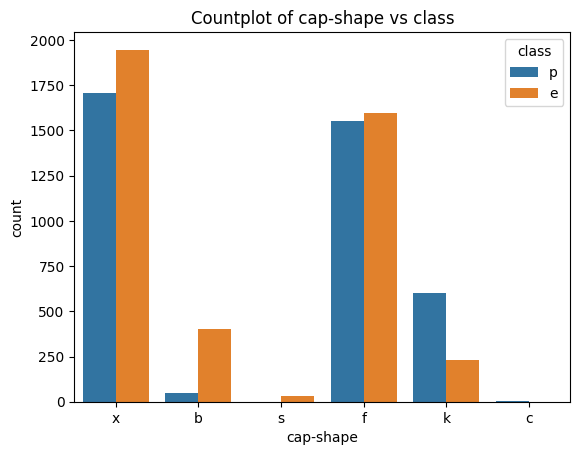

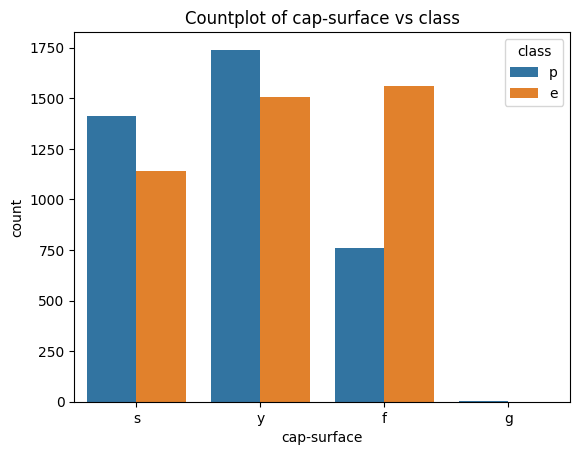

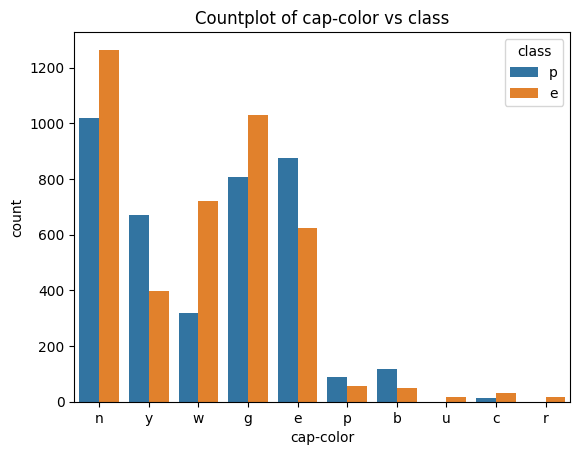

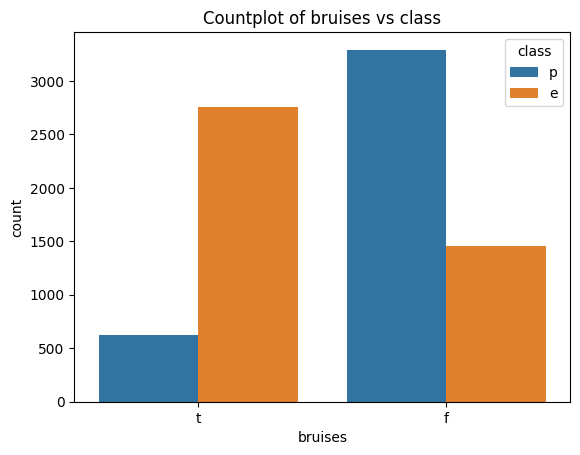

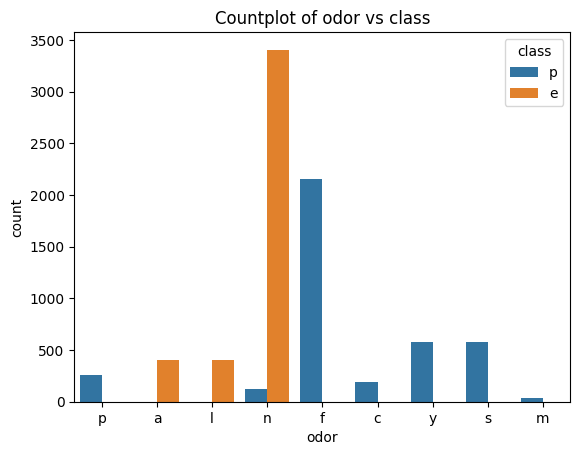

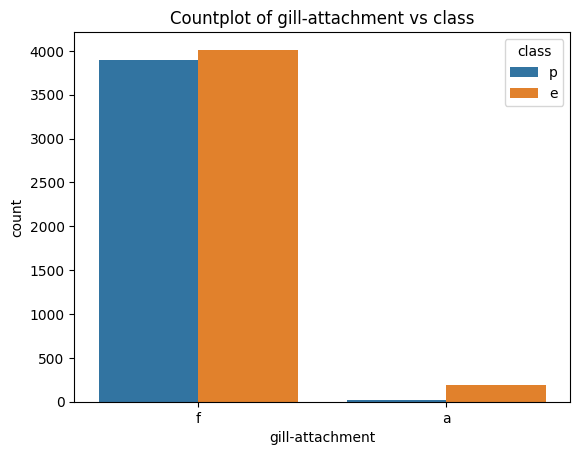

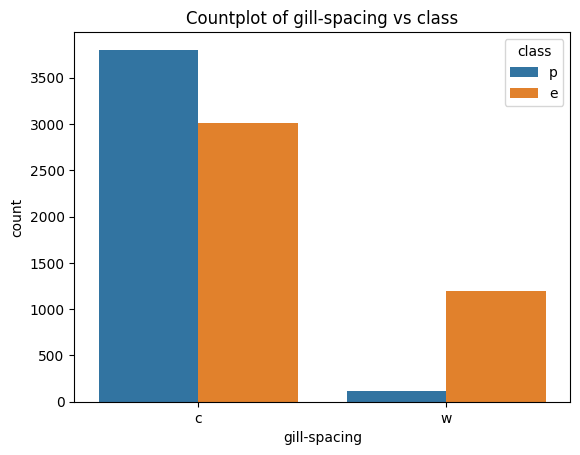

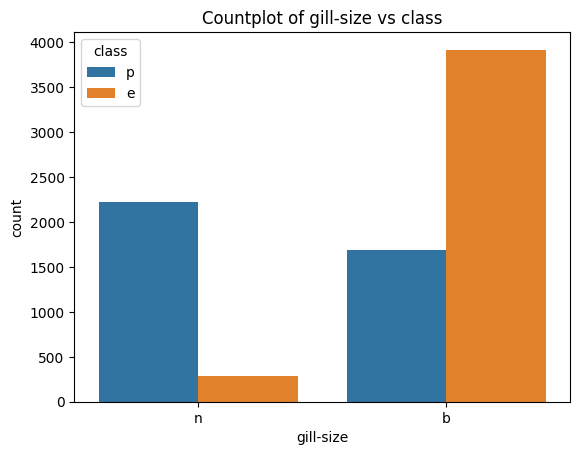

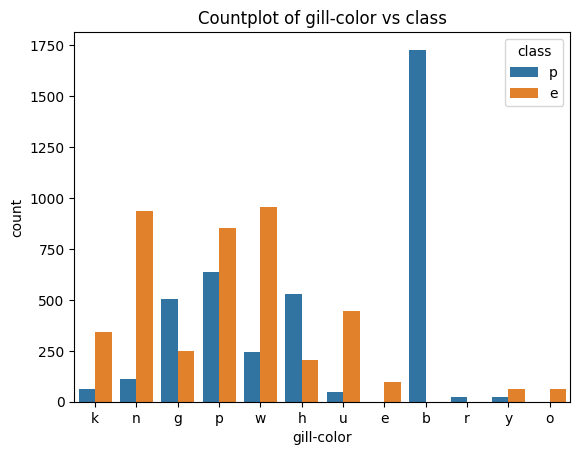

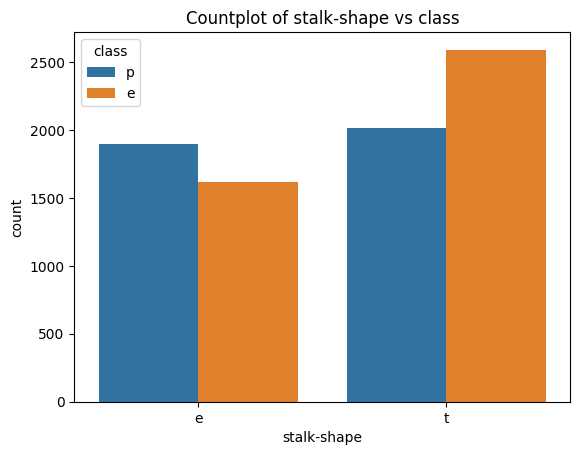

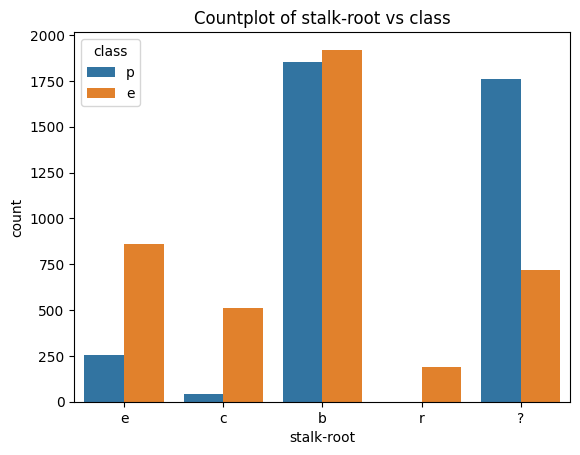

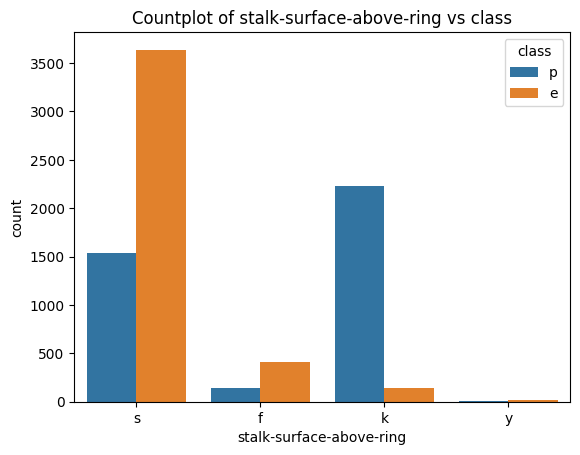

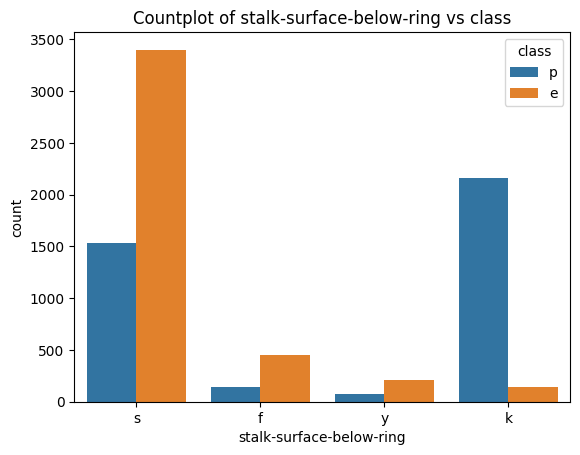

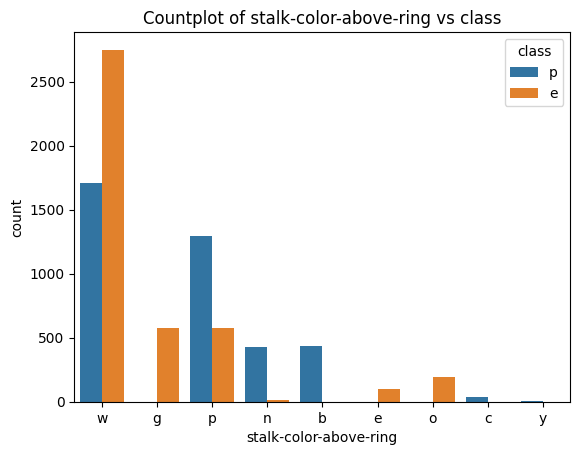

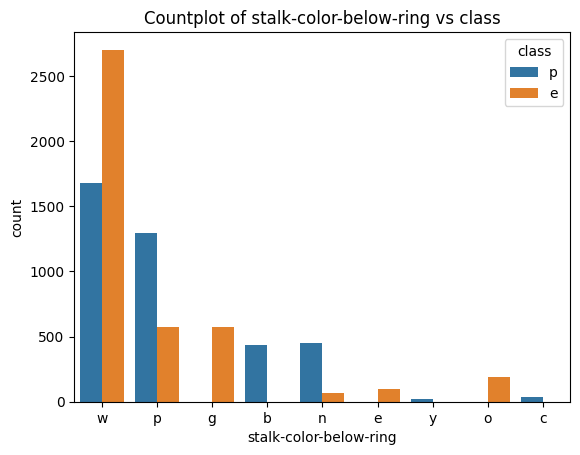

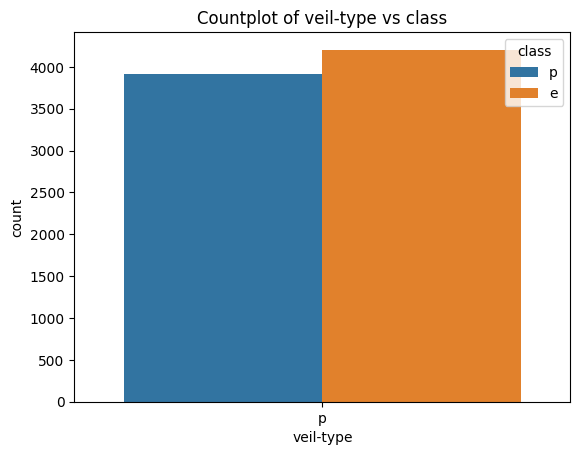

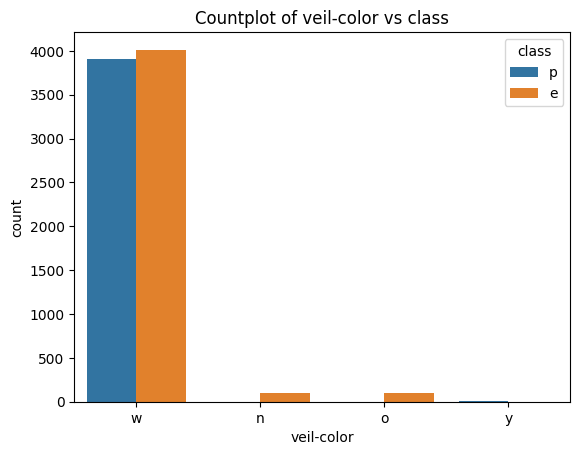

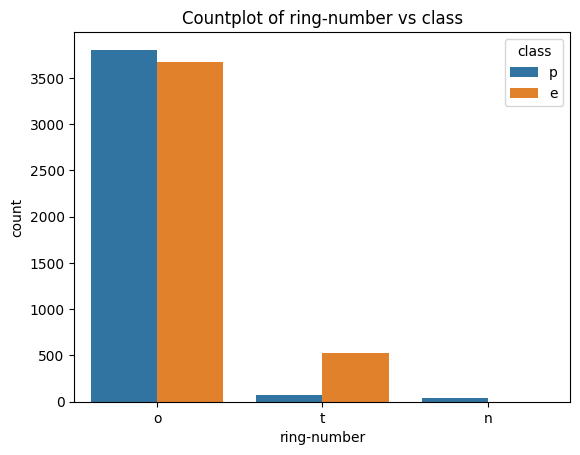

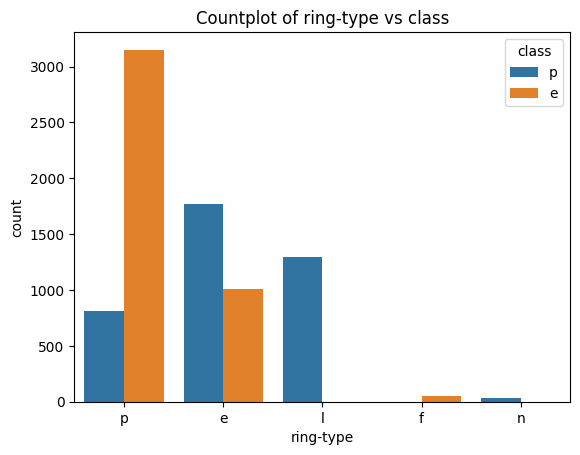

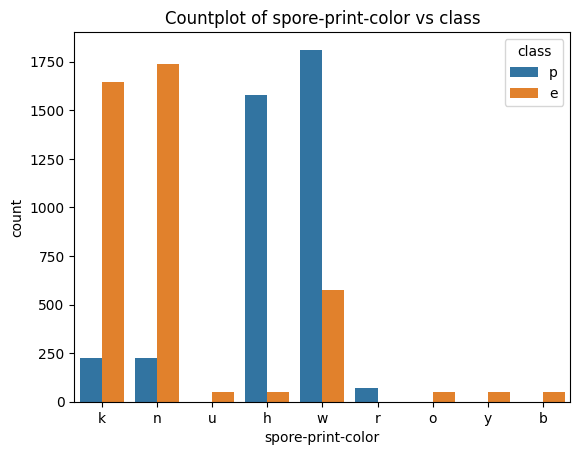

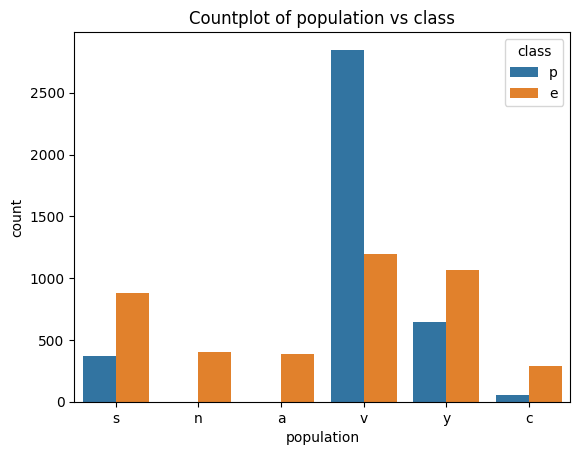

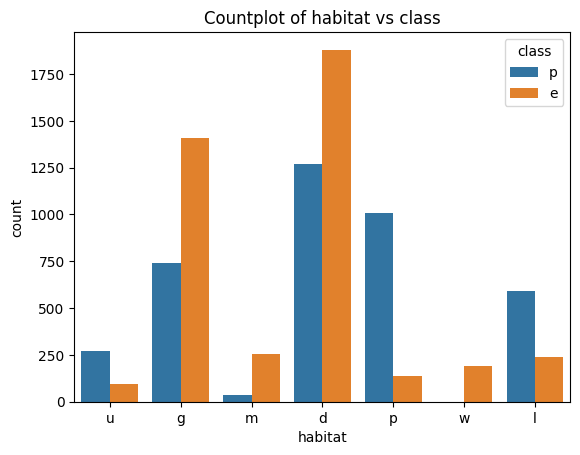

In [668]:
# Scatter plot ile ilişkileri anlama
for i in df.columns[1:]:
    sns.countplot(data=df, x=i, hue='class')
    plt.title(f'Countplot of {i} vs class')
    plt.show()


# sns.pairplot(df, hue='class', diag_kind='kde') 


-> Numrec degiskenler için Güzel özellikler:
 * sns.distplot(df['price']) # o featurenin dağılımını veriyor güzel bir analiz
 * sns.pairplot(df, hue='numeric', diag_kind='kde') 
 * df.corr()
 * df.corr["price"].sort_values()
 * verilerin %100 ü ile çalışmak istemiyorsan %99 uylada çalışabilirsin (13100 veriden 131 tanesini atabilirsin)
 * df.groupy("year").mean()["price"] -> yılları getiriyor ve yıla göre ortalama fiyatları yılın yanına yazarak 2 sutunlu tablo oluşturuyor

# 5) Eksik değer Yapılandırması 

In [669]:
# '?' değerlerini NaN ile değiştir
df.replace('?', np.nan, inplace=True)

In [670]:
# Null değerleri kontrol et
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [671]:
df['stalk-root'].value_counts()

stalk-root
b    3773
e    1118
c     555
r     192
Name: count, dtype: int64

📌 stalk-root Özelliği Özeti:

* Toplam: 8124 veri

* Eksik değer: 2480 (~%30.5 → az değil)

Kategori dağılımı:

- b: 3776 (~46.5%)

- e: 1120 (~13.8%)

- c: 556 (~6.9%)

- r: 192 (~2.4%)



- Eksik verileri doldurmak için doğru yöntem seçilmeli
- Örneğin ortalama ,ortanca, mod yada KNNinputer gibi yöntemler kullanılabilir
- Yaygın olarak eksik numeric verileri doldurmak için KNN imputer kullanılır. (bizim için uygun değil)
- Yaygın olarak eksik Kategorik verileri doldurmak için en sık geçen değer (Mode) kullanılır.
- Ama Biz burda en iyi performans vereceğini düşündüğüm için özellik değerlerinin ağırlıklarına oranla rastgele değerlerle dolduracağız

In [672]:
# Mevcut eksik olmayan değerleri bir diziye alalım
values = df['stalk-root'].dropna().values
# Eksik değer sayısını hesaplayalım
missing_count = df['stalk-root'].isnull().sum()

# Mevcut değerlerden eksik değer sayısı kadar rastgele seçiyoruz
# Bu değerlerin dağılımını koruyarak eksik değerleri dolduracağız
# Rastgele seçim yaparken mevcut değerlerin dağılımını korumak için p parametresini kullanıyoruz.
# replace=True → aynı değer birden fazla seçilebilir
imputed_values = np.random.choice(['b', 'e', 'c', 'r'], size=missing_count, replace=True, p=[0.4, 0.3, 0.2, 0.1])

# Eksik değerleri bu rastgele seçilen değerlerle dolduruyoruz
df.loc[df['stalk-root'].isnull(), 'stalk-root'] = imputed_values

In [673]:
# Null değerleri kontrol et
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# 6) Outliers Yapılandırması 


- Mushroom dataset'inde veriler kategorik olduğu için outlier Yapılandırmasına gerek yok
- Eğer yapmak isteydik boxplot çizdirerek aykırı değerleri tespit edebilirdik

# 7) Tekrar Eden ve İşeyaramaz verilerin Yapılandırması

In [674]:
# Çift değerleri kontrol et
df.duplicated().sum()
#Çıktı:
# 0

np.int64(0)

# 8) Data Encoding
 

📌 Class Sütünu

- Binary target (e / p) → yani 2 sınıflı bir hedef değişken
- 📌 Label Encoding en doğru ve standart yöntemdir.
- ✅ class → Label Encoding

📌 Diğer Sütünlar

- 🍄 cap-shape → bell, conical, convex, flat, knobbed, sunken
- ✅ Sırasız → One-hot

- 🍄 cap-surface → fibrous, grooves, scaly, smooth
- ✅ Sırasız → One-hot

- 🍄 cap-color → brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow
- ✅ Sırasız renkler → One-hot

- 🍄 bruises? → bruises, no
- 📌 Binary ama herhangi bir sıralama yok, burada

- DL modeline direkt Label encoding verilebilir (0/1)

- Ama modelin katmanlarında bias yaratmaması için One-hot encoding tercih edilir
- ✅ Yani burada One-hot encoding

- 🍄 odor → almond, anise, creosote, fishy, foul, musty, none, pungent, spicy
- ✅ Sırasız → One-hot

- 🍄 gill-attachment → attached, descending, free, notched
- ✅ Sırasız → One-hot

- 🍄 gill-spacing → close, crowded, distant
- ✅ Sıralı gibi durabilir (crowded < close < distant?) ama veri sözlüğünde böyle bir bilgi yok, sıralama anlamı yok → One-hot

- 🍄 gill-size → broad, narrow
- 📌 Binary ama sıralama var mı?
- B → geniş N → dar
- Belki sıralı sayılabilir ama çoğu DL uygulamasında One-hot encoding tercih edilir
- ✅ Yine One-hot

- 🍄 gill-color → renkler
- ✅ Sırasız → One-hot

- 🍄 stalk-shape → enlarging, tapering
- 📌 2 değerli ama sıralı değil
- ✅ One-hot

- 🍄 stalk-root → bulbous, club, cup, equal, rhizomorphs, rooted, missing
- ✅ Sırasız → One-hot

- 🍄 stalk-surface-above-ring → fibrous, scaly, silky, smooth
- ✅ Sırasız → One-hot

- 🍄 stalk-surface-below-ring → aynı → One-hot
- 🍄 stalk-color-above-ring → renkler
- ✅ Sırasız → One-hot

- 🍄 stalk-color-below-ring → aynı → One-hot
- 🍄 veil-type → partial, universal
- 📌 Binary ama veri dağılımında genelde hep aynı olabilir (kontrol et)
- Eğer tek tip değilse → One-hot

- 🍄 veil-color → renkler
- ✅ Sırasız → One-hot

- 🍄 ring-number → none, one, two
- ✅ Aslında sayı sırası var ama kategorik değer olduğu için ve DL modelde bias yaratmaması için One-hot encoding

- 🍄 ring-type → cobwebby, evanescent, flaring, large, none, pendant, sheathing, zone
- ✅ Sırasız → One-hot

- 🍄 spore-print-color → renkler
- ✅ Sırasız → One-hot

- 🍄 population → abundant, clustered, numerous, scattered, several, solitary
- ✅ Sırasız → One-hot

- 🍄 habitat → grasses, leaves, meadows, paths, urban, waste, woods
- ✅ Sırasız → One-hot


In [675]:
df['veil-type'].value_counts()

veil-type
p    8118
Name: count, dtype: int64

* 'veil-type' özelliği sadece p değeri içeriyor
* Bu özellik Modele katkı sağlamayacağı için çıkarılmıştır

In [676]:
# 'veil-type' sütununu kaldırıyoruz çünkü sadece tek bir değere sahip
df.drop(columns=['veil-type'], inplace=True)

In [677]:
# Sütun isimlerini kontrol et
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

* df = Encode edilmemiş, Null değerleri dolduruş, 'veil-type' özelliği çıkarılmış data

In [678]:
# Class sütunu için Label Encoding
le = LabelEncoder()
# kopy alıyoruz çünkü orijinal veri setini değiştirmek istemiyoruz
df_encoded = df.copy()
# 'class' sütununu label encoding ile sayısal değerlere dönüştürüyoruz
df_encoded['class'] = le.fit_transform(df['class'])

In [679]:
# One-hot encoding uygulanacak sütunlar (class hariç tüm kategorik sütunlar)
one_hot_cols = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
    'spore-print-color', 'population', 'habitat'
]

# One-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols)


* df_encoded = Encode edilmiş, Null değerleri dolduruş, 'veil-type' özelliği çıkarılmış data

In [680]:
df_encoded.info()
# One-hot encoding sonrası veri setinin boyutunu kontrol et
# Çıktı:
# RangeIndex: 8124 entries, 0 to 8123
# Data columns (total 119 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Columns: 116 entries, class to habitat_w
dtypes: bool(115), int64(1)
memory usage: 975.2 KB


In [681]:
df_encoded.head()
# One-hot encoding sonrası veri setinin ilk 5 satırını göster

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,False,False,False,False,False,True,False,False,True,...,True,False,False,False,False,False,False,False,True,False
1,0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
3,1,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,0,False,False,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [682]:
df_encoded.shape
# Çıktı:
# (8124, 119)

(8118, 116)

# 9) Deep Learning ile Model Eğitimi

In [683]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix



In [684]:
y = df_encoded["class"].values
x = df_encoded.drop(columns=["class"]).values

In [685]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [686]:
x

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [687]:
# Modeli train ve test setine ayır
# x ve y'yi %70 train %30 test setine ayırıyoruz (yaygın kullanım)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
 

In [688]:
# Ayrılan veri setlerinin boyutlarını kontrol et
len(x_train), len(x_test), len(y_train), len(y_test)

(7306, 812, 7306, 812)

In [689]:
scaler = MinMaxScaler()
# Veriyi ölçeklendir
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [690]:
x_train.shape

(7306, 115)

In [691]:
# Modeli oluştur
model = Sequential()
# 1. İlk (Giriş) Katmanları
# relu aktivasyon fonksiyonu, doğrusal olmayan ilişkileri öğrenmeyi sağlar
# 115 nöron, ReLU aktivasyon fonksiyonu, giriş şekli x_train'in boyutu
# BatchNormalization ve Dropout katmanları ekleriz
model.add(Dense(20, activation='relu', input_shape=(x_train.shape[1],)))
#BatchNormalization(): 
# Eğitim sırasında katman çıktısını normalize eder,öğrenmeyi hızlandırır ve daha stabil hale getirir.
model.add(BatchNormalization())
# Dropout: Aşırı öğrenmeyi önlemek için rastgele nöronları kapatır
model.add(Dropout(0.5))

# 2. Orta (Gizli) Katmanlar
# 64 nöron, ReLU aktivasyon fonksiyonu
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='relu'))
model.add(Dropout(0.5))

# 3. Çıkış Katmanı
# 1 nöron, sigmoid aktivasyon fonksiyonu (binary classification için)
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Eğitme
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=1,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


c:\Users\gelis\Desktop\Bilgisayar Mühendisliği\Sınıf-3\Bahar\Veri Madenciliği\odev2\.venv-tf\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


229/229 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5580 - loss: 0.8623 - val_accuracy: 0.9113 - val_loss: 0.4802


In [692]:
# Test sonrası değerlendirme
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9176 - loss: 0.4815 
Test Accuracy: 0.9113


In [693]:
# Sınıflandırma raporu
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       449
           1       0.98      0.82      0.89       363

    accuracy                           0.91       812
   macro avg       0.93      0.90      0.91       812
weighted avg       0.92      0.91      0.91       812



*  Confusion Matrix (Karışıklık Matrisi)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


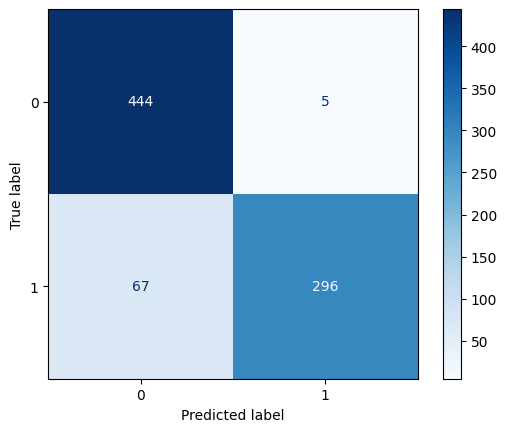

In [694]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Test verisi üzerinde tahmin
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Binary class için threshold

# Confusion matrix oluştur ve göster
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

* ROC Curve (Alıcı Çalışma Karakteristik Eğrisi)

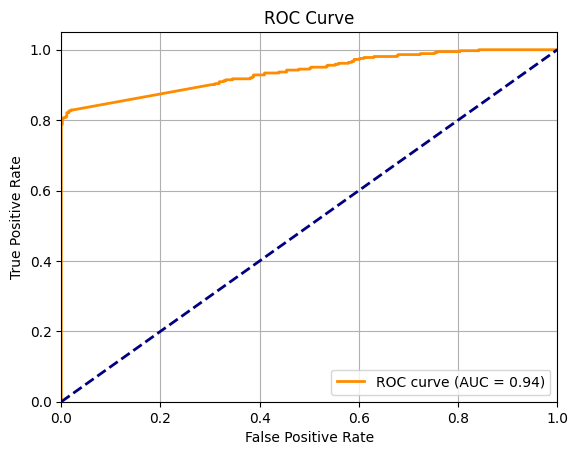

In [695]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC curve için değerler
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# ROC grafiği
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [696]:
raw_samples = [
    "p,f,s,b,t,f,f,c,b,p,t,b,f,s,w,w,w,o,p,h,s,u",
    "p,f,s,g,t,f,f,c,b,h,t,b,s,s,w,w,w,o,p,h,s,u",
    "p,x,f,y,f,f,f,c,b,p,e,b,k,k,n,p,w,o,l,h,y,d",
    "e,x,s,y,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m",
    "e,f,s,g,f,n,f,w,b,n,t,e,f,f,w,w,w,o,e,n,a,g",
    "e,x,s,w,f,n,f,w,b,h,t,e,s,f,w,w,w,o,e,n,s,g"
    
]

# Stringleri liste haline getir
sample_rows = [row.split(",") for row in raw_samples]

# Ana veri setinde kullanılan kolon isimlerini buraya girmen gerek
# Eğer elinde orijinal kolon adları varsa buraya yaz
# Örnek olarak 23 sütunluk bir veri seti için (bu mushroom dataset olabilir):
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-color", "ring-number",
    "ring-type", "spore-print-color", "population", "habitat"
]

# DataFrame'e çevir
df_new = pd.DataFrame(sample_rows, columns=column_names)


In [697]:

# Eğitimdeki encoding'i uygulamak için: df_encoded ile aynı sütun yapısını oluşturmalısın
# df_encoded = pd.get_dummies(df, drop_first=True) yaptıysan burada da aynısını yap:
df_new_encoded = pd.get_dummies(df_new.drop("class", axis=1))



In [698]:
# Eğitimdeki sütunları al
model_columns = df_encoded.drop("class", axis=1).columns

# Yeni veriyi aynı sütunlara göre hizala, eksik olanları 0 ile doldur
df_new_encoded = df_new_encoded.reindex(columns=model_columns, fill_value=0)

# Eğitimde kullandığın scaler ile yeni veriyi ölçeklendir
df_new_encoded_scaled = scaler.transform(df_new_encoded)

# Tahmin et
predictions = model.predict(df_new_encoded_scaled)
predicted_classes = (predictions > 0.5).astype(int)

print("Bağımsız örneklerin tahmin edilen sınıfları:")
print(predicted_classes.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Bağımsız örneklerin tahmin edilen sınıfları:
[1 1 1 0 0 0]


c:\Users\gelis\Desktop\Bilgisayar Mühendisliği\Sınıf-3\Bahar\Veri Madenciliği\odev2\.venv-tf\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
